In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile # package to read WAV file
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")
import latexify as lt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.io import wavfile
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Audio

#for filter
from scipy.signal import butter
from scipy.signal import lfilter
from scipy.signal import freqz;

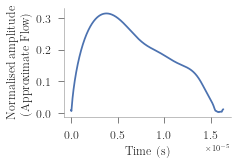

In [11]:
#generating more figures for the paper
lt.latexify(columns=1, fig_height=2, fig_width=3)
figname = "pipeline-figure/pipeline-6"
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
fs=16000
x = x/np.max(np.abs(x))
fvcStartIndex = np.where(x>=0.50)
x = x[fvcStartIndex[0][0]-5000:]
t = np.arange(0,len(x))/fs


axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

ax = plt.subplot(1,1,1)
ax.plot(estdVolume,envelope_hat_filt)
#ax.plot(estdVolume,envelope_hat_filt)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Normalised amplitude\n (Approximate Flow)', fontsize=12)

ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')

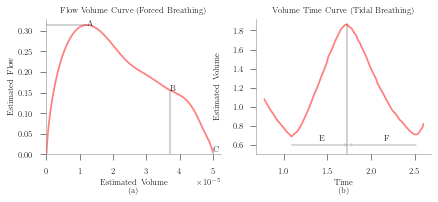

In [135]:
# temp code for generating a key image for the paper.

lt.latexify(columns=2, fig_height=2.5)
figname = "fb-tb-main"
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
fs = 16000
#fig, ax = plt.subplots(nrows=1, ncols=1)
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
fvcStartIndex = np.where(x>=0.50)
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
t = np.arange(0,len(x))/fs
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)




ax = plt.subplot(1,2,1)
ax.plot(estdVolume, envelope_hat_filt, color='red', alpha=0.5)
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_xlabel('Estimated Volume\n (a)')
ax.set_ylabel('Estimated Flow')
ax.set_title('Flow Volume Curve (Forced Breathing)')
PEFannotateX = estdVolume[np.where(envelope_hat_filt == np.max(envelope_hat_filt))[0][0]]
PEFannotateY = np.max(envelope_hat_filt)
ax.annotate('A', xy =(PEFannotateX, PEFannotateY), xytext =(PEFannotateX, PEFannotateY))
ax.hlines(PEFannotateY, 0, PEFannotateX, colors='k', linestyles='solid', label='', alpha=0.2)
FEVannotateX = estdVolume[16000]
FEVannotateY = envelope_hat_filt[16000]
ax.annotate('B', xy =(FEVannotateX, FEVannotateY), xytext =(FEVannotateX, FEVannotateY))
ax.vlines(FEVannotateX, 0, FEVannotateY, colors='k', linestyles='solid', alpha=0.2)
FVCannotateX = estdVolume[-1]
FVCannotateY = envelope_hat_filt[-1]
ax.annotate('C', xy =(FVCannotateX, FVCannotateY), xytext =(FVCannotateX, FVCannotateY))
ax.vlines(FVCannotateX, 0, FVCannotateY, colors='k', linestyles='solid', alpha=0.2)
  
lt.format_axes(ax)

ax = plt.subplot(1,2,2)
x2 = pd.read_csv('sample-tidal.csv')
ax.plot(x2['X'], x2['Y'],color='red',alpha=0.5)
ax.set_ylim(0.5,)
ax.set_ylabel('Estimated Volume\n')
ax.set_xlabel('Time\n (b)')
ax.set_title('Volume Time Curve (Tidal Breathing)')



ax.arrow(1.08782718105938, 0.6, 0.60476226762, 0, width=0.01, color='k', linestyle='solid', alpha=0.2) 
ax.vlines(1.7225894486877298, 0, 1.86549823672225, colors='k', linestyles='solid', alpha=0.2)
ax.annotate('E', xy =(1.40520831487,0.65), xytext =(1.40520831487, 0.65))

ax.arrow(2.5151783657339304, 0.6, -0.73258891704, 0, width=0.01, color='k', linestyle='solid', alpha=0.2) 
ax.annotate('F', xy =(2.15,0.65), xytext =(2.15, 0.65))



lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')

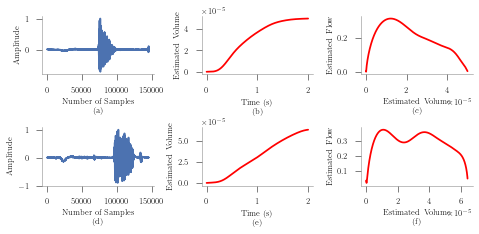

In [10]:
# temp code for generating a key image for the paper.
figname = "flowVSvolume"
lt.latexify(columns=2, fig_height=3)
fs = 16000
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
#print("Reading:", file)
fig, ax = plt.subplots(2,3)

x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
ax[0,0].plot(x)
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Number of Samples\n (a)')

lt.format_axes(ax[0,0])

#detect the starting point of FVC
fvcStartIndex = np.where(x>=0.50)
#move back x second from the point FVC started and go till y seconds
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
#print("SNR=", x.mean()/x.std())
t = np.arange(0,len(x))/fs

# get analytic signal
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
#Corresponds to PEF
#rPEF.append(100000*envelope_hat_filt_normalized.max())
#print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)
#FEV1 Estimate
#rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
#print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
ax[0,1].plot(t,estdVolume, color='red')
ax[0,1].set_ylabel('Estimated Volume')
ax[0,1].set_xlabel('Time (s)\n (b)')
lt.format_axes(ax[0,1])


ax[0,2].plot(estdVolume, envelope_hat_filt, color='red')
ax[0,2].set_xlabel('Estimated Volume\n (c)')
ax[0,2].set_ylabel('Estimated Flow')
lt.format_axes(ax[0,2])
fig.tight_layout()

######################################################################
######################################################################
######################################################################
######################################################################

file = "012_FVC_Cloth_2.json"
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
ax[1,0].plot(x)
ax[1,0].set_ylabel('Amplitude')
ax[1,0].set_xlabel('Number of Samples\n (d)')

lt.format_axes(ax[1,0])

#detect the starting point of FVC
fvcStartIndex = np.where(x>=0.50)
#move back x second from the point FVC started and go till y seconds
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
#print("SNR=", x.mean()/x.std())
t = np.arange(0,len(x))/fs

# get analytic signal
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
#Corresponds to PEF
#rPEF.append(100000*envelope_hat_filt_normalized.max())
#print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)
#FEV1 Estimate
#rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
#print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
ax[1,1].plot(t,estdVolume, color='red')
ax[1,1].set_ylabel('Estimated Volume')
ax[1,1].set_xlabel('Time (s)\n (e)')
lt.format_axes(ax[1,1])


ax[1,2].plot(estdVolume, envelope_hat_filt, color='red')
ax[1,2].set_xlabel('Estimated Volume\n (f)')
ax[1,2].set_ylabel('Estimated Flow')
lt.format_axes(ax[1,2])



plt.savefig(figname+'.pdf', bbox_inches='tight')
plt.show()

In [18]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes);

In [24]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y;

In [20]:
import os
mypath="clothdata/"
(_, _, filenames) = next(os.walk(mypath))

Reading: 005_FVC_Cloth_1.json
SNR= -0.007987858649803876
Raw PEF =  5.643968165210454
Raw FEV1 =  1.2263619666784389
Raw FVC =  2.1416255592216453
Ratio% =  57.26313647116489





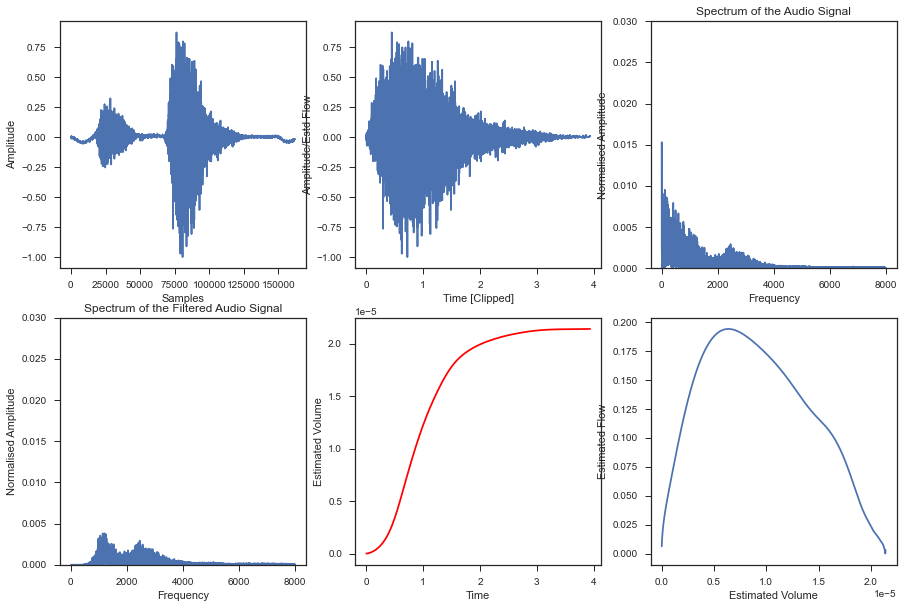

Reading: 005_FVC_Cloth_2.json
SNR= 0.0042762237037340285
Raw PEF =  6.254566601169531
Raw FEV1 =  1.3676839316854734
Raw FVC =  2.0657912723855656
Ratio% =  66.20629828230801





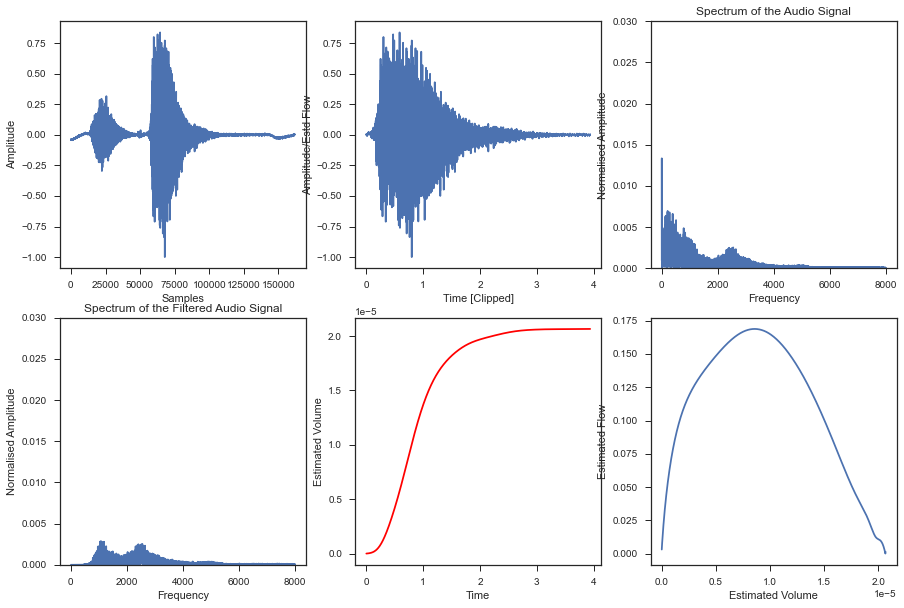

Reading: 006_FVC_Cloth_1.json
SNR= 0.00018339277992356334
Raw PEF =  6.493528128245596
Raw FEV1 =  1.430016974594604
Raw FVC =  2.0096019532696574
Ratio% =  71.1592150011569





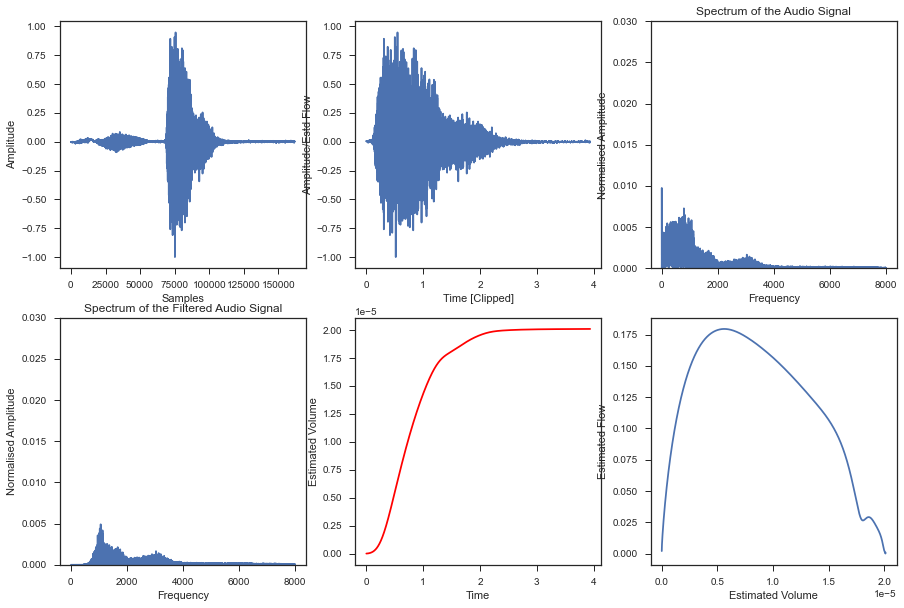

Reading: 006_FVC_Cloth_2.json
SNR= 0.0015703551048907025
Raw PEF =  6.947900440703211
Raw FEV1 =  1.3607987449858783
Raw FVC =  2.0221749540181837
Ratio% =  67.29381858290199





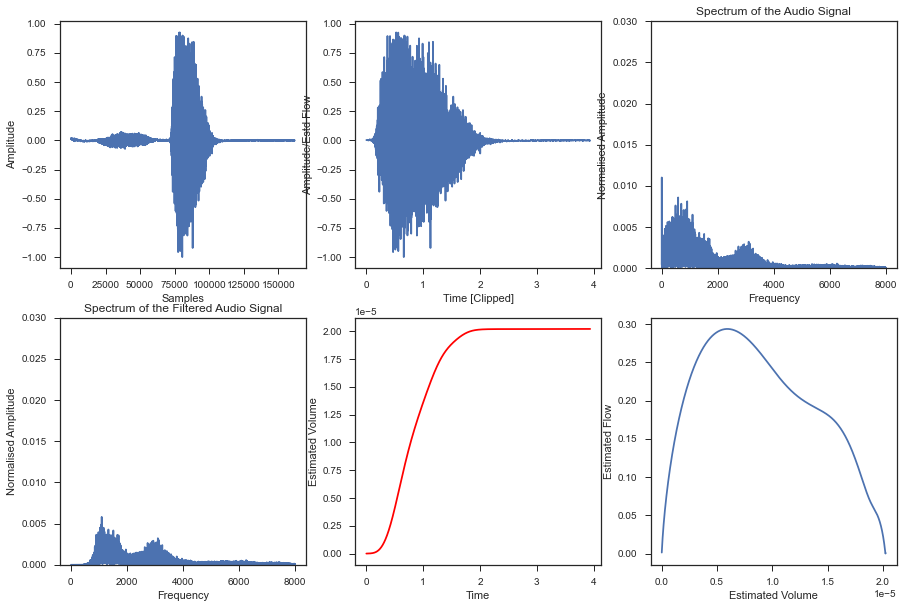

Reading: 008_FVC_Cloth_1.json
SNR= 0.0009965433667097254
Raw PEF =  12.432594570544538
Raw FEV1 =  1.7614668734980403
Raw FVC =  1.8410499153849
Ratio% =  95.67730123872163





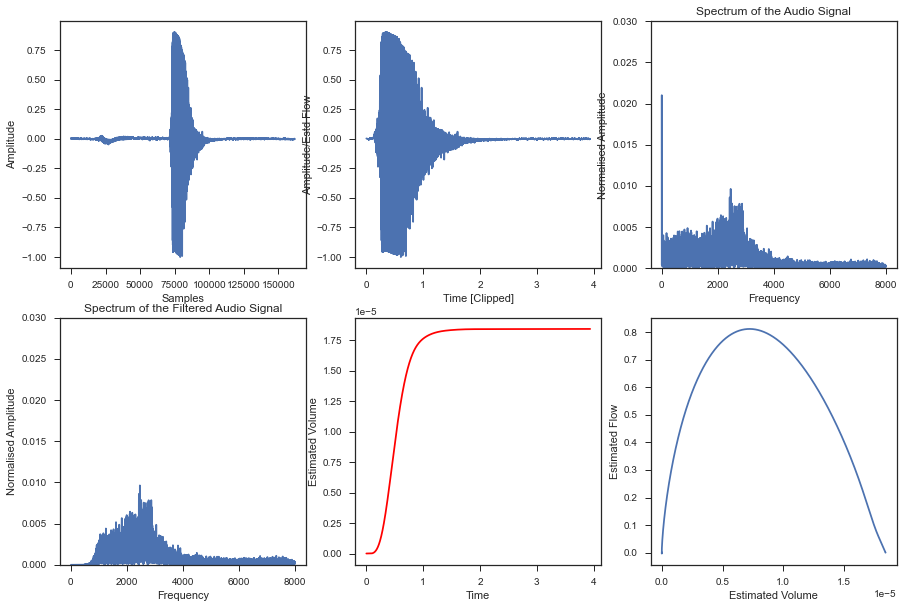

Reading: 008_FVC_Cloth_2.json
SNR= 0.002246592392798735
Raw PEF =  10.585916269441276
Raw FEV1 =  1.7248721257846198
Raw FVC =  1.9139298480517064
Ratio% =  90.12201400905374





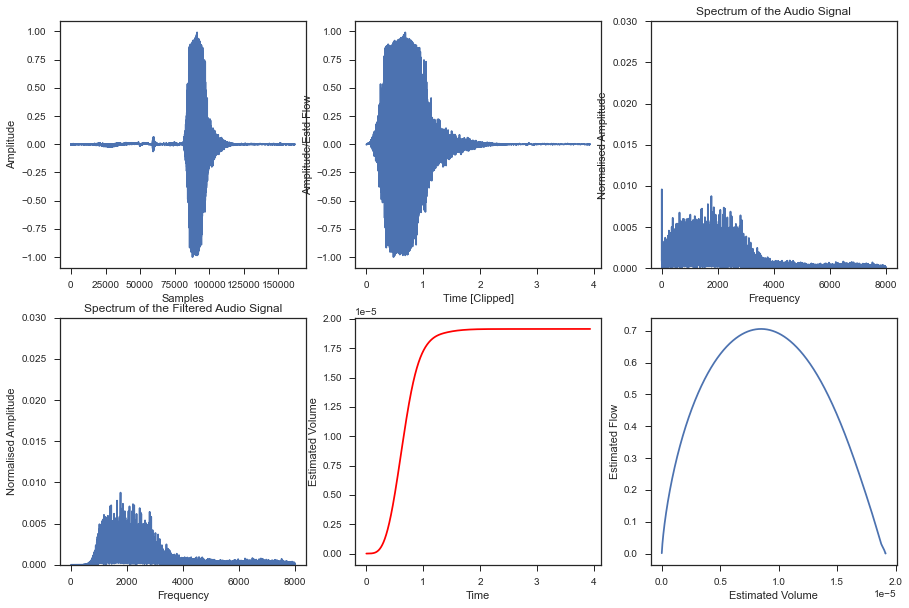

Reading: 009_FVC_Cloth_1.json
SNR= 0.0027738177254515092
Raw PEF =  4.448336788871534
Raw FEV1 =  1.0462601097581754
Raw FVC =  2.1937887194019696
Ratio% =  47.69192677968495





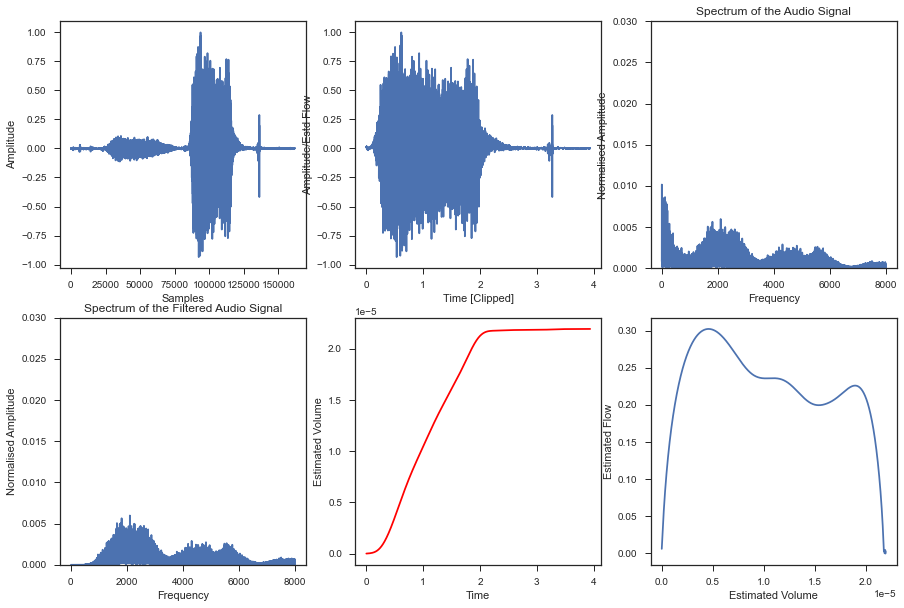

Reading: 009_FVC_Cloth_2.json
SNR= 0.0025264980173591014
Raw PEF =  5.8843867779723205
Raw FEV1 =  1.3271210406772507
Raw FVC =  2.043702944536665
Ratio% =  64.9370812047309





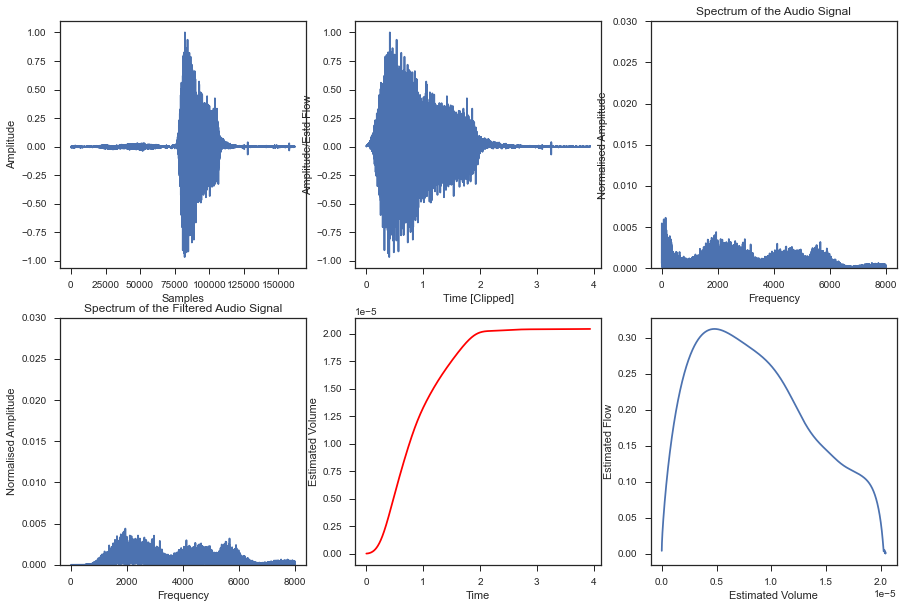

Reading: 010_FVC_Cloth_1.json
SNR= 0.01140988963134386
Raw PEF =  5.9246445909555625
Raw FEV1 =  1.2190509160164542
Raw FVC =  2.1307332676189916
Ratio% =  57.212741479307475





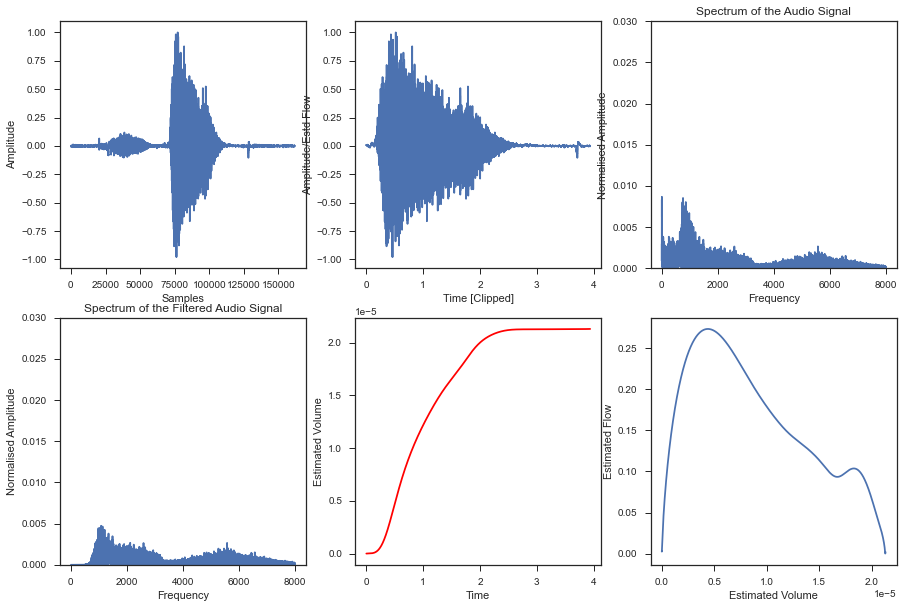

Reading: 010_FVC_Cloth_2.json
SNR= 0.01764960082591331
Raw PEF =  4.185633966592805
Raw FEV1 =  1.0038395412610839
Raw FVC =  2.253868344373108
Ratio% =  44.538517246014756





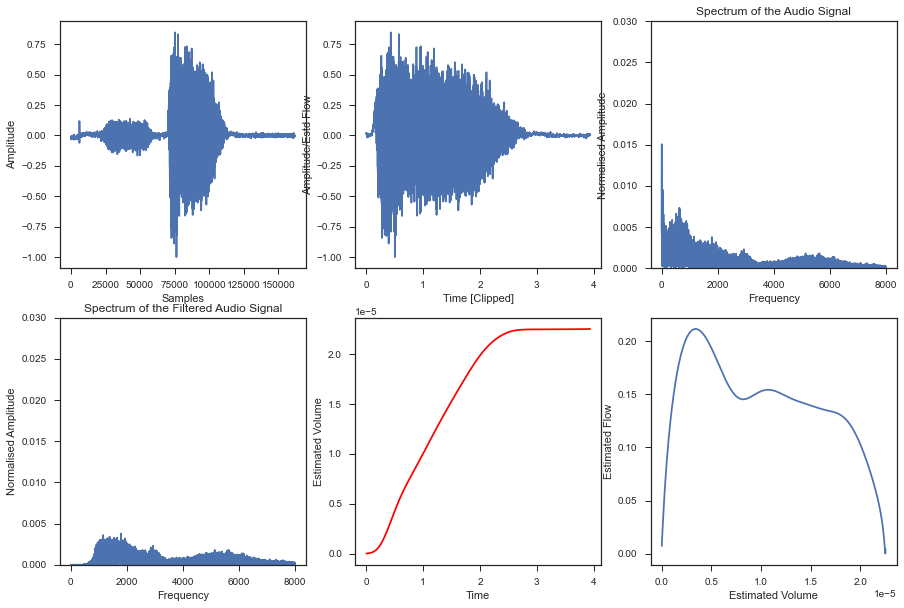

Reading: 012_FVC_Cloth_1.json
SNR= 0.006591466860279394
Raw PEF =  8.675739800808836
Raw FEV1 =  1.5489775703157018
Raw FVC =  1.9416285025104516
Ratio% =  79.77723690772632





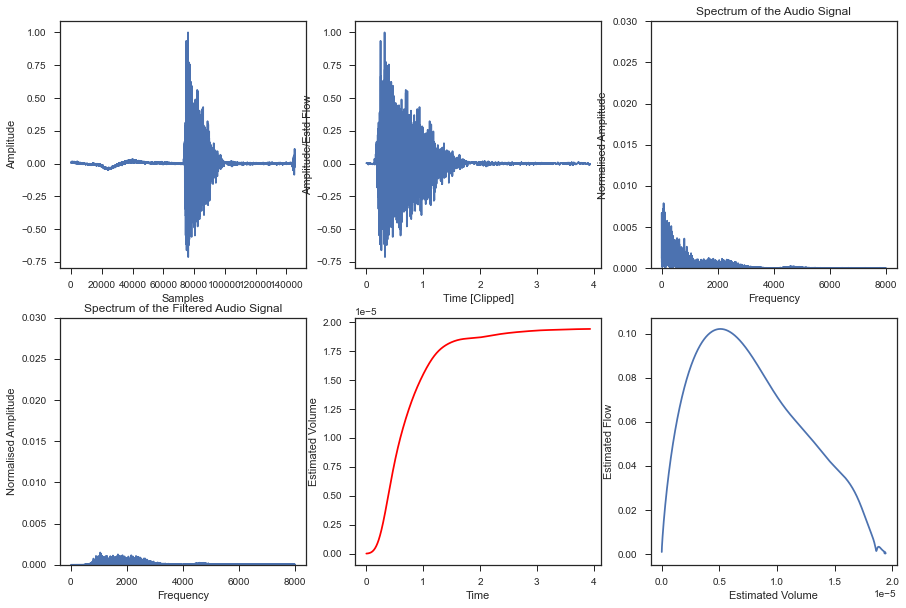

Reading: 012_FVC_Cloth_2.json
SNR= 0.010198394543641725
Raw PEF =  5.180217298852689
Raw FEV1 =  1.4536808451200902
Raw FVC =  2.692683628414546
Ratio% =  53.98632166735528





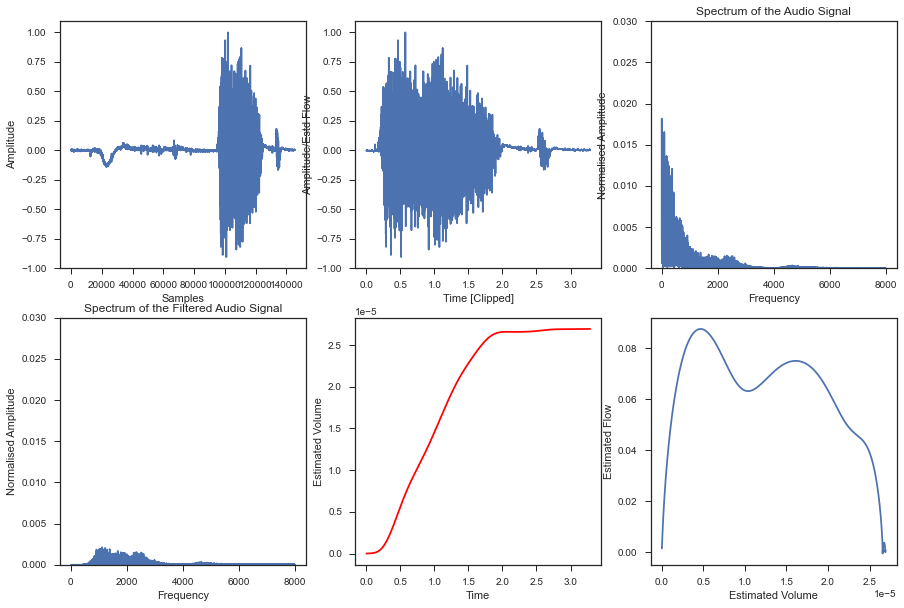

Reading: 013_FVC_Cloth_1.json
SNR= -0.010720555396479028
Raw PEF =  8.740001346790942
Raw FEV1 =  1.8006284023198895
Raw FVC =  1.8724999200461614
Ratio% =  96.16173453697664





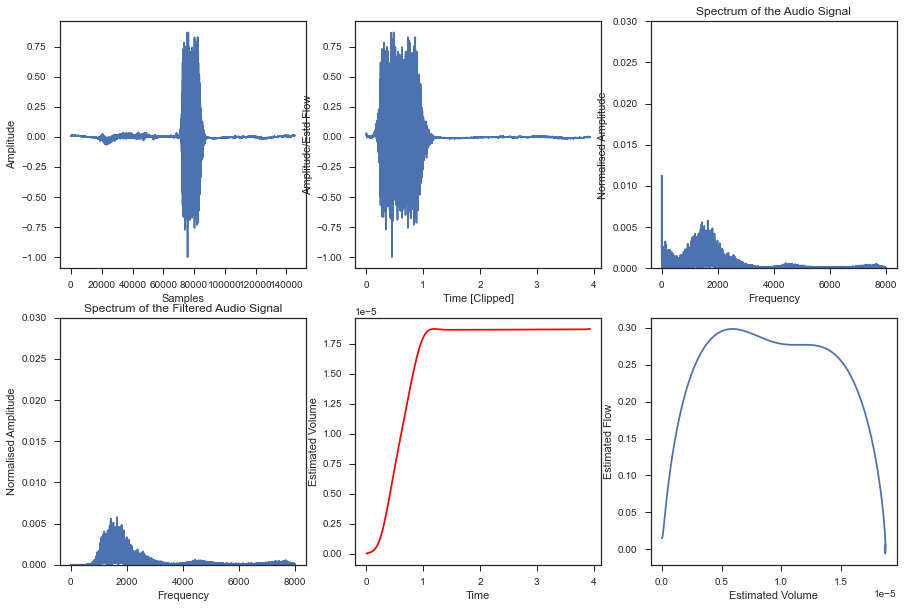

Reading: 013_FVC_Cloth_2.json
SNR= -0.004170159874653005
Raw PEF =  10.091362356648819
Raw FEV1 =  1.7955647275366606
Raw FVC =  1.8581641987581
Ratio% =  96.63111197259761





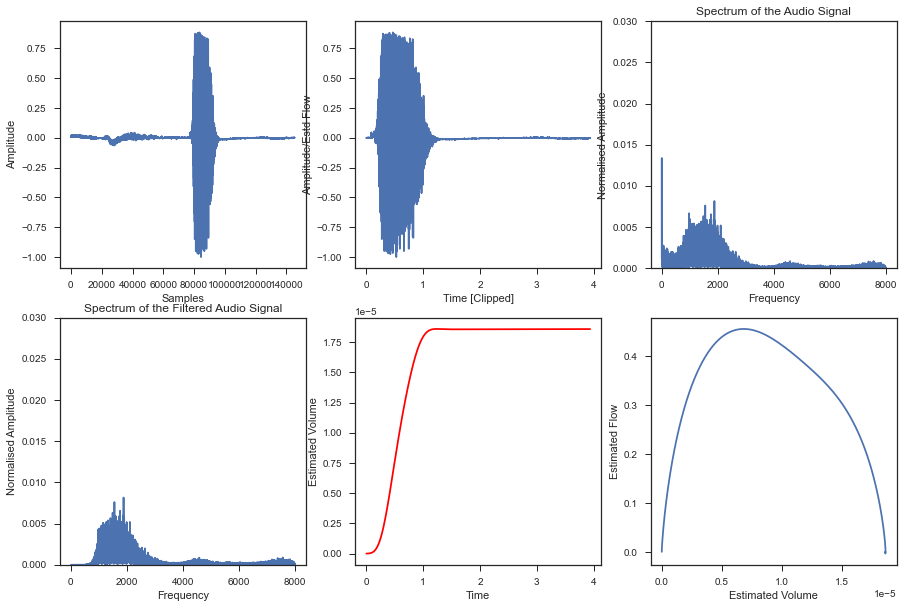

Reading: 014_FVC_Cloth_1.json
SNR= -0.007976605808884965
Raw PEF =  13.771744581592122
Raw FEV1 =  1.7626093899846886
Raw FVC =  1.8173134978953678
Ratio% =  96.98983648258641





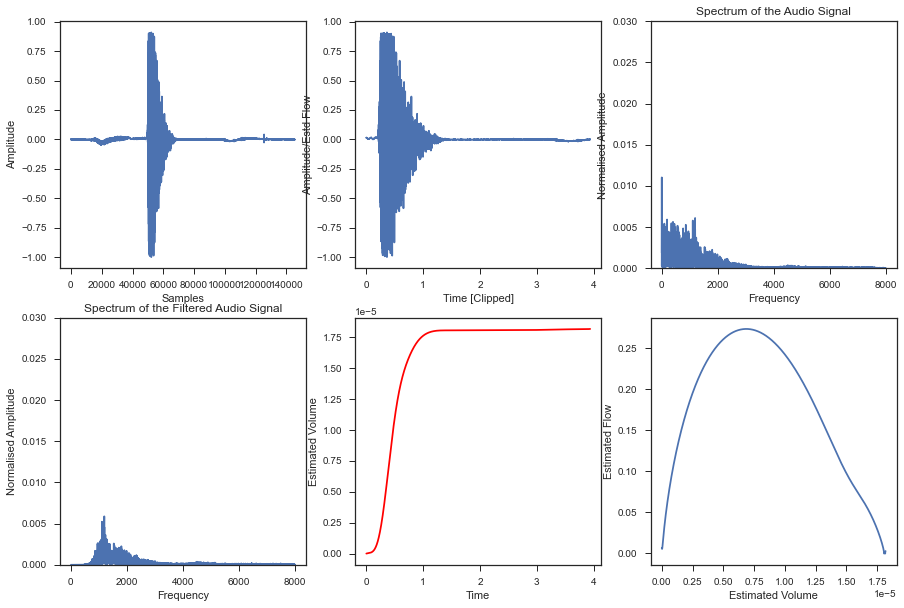

Reading: 014_FVC_Cloth_2.json
SNR= -0.018898100541798427
Raw PEF =  13.56241449487587
Raw FEV1 =  1.7714157413091582
Raw FVC =  1.867835742653617
Ratio% =  94.83787577554996





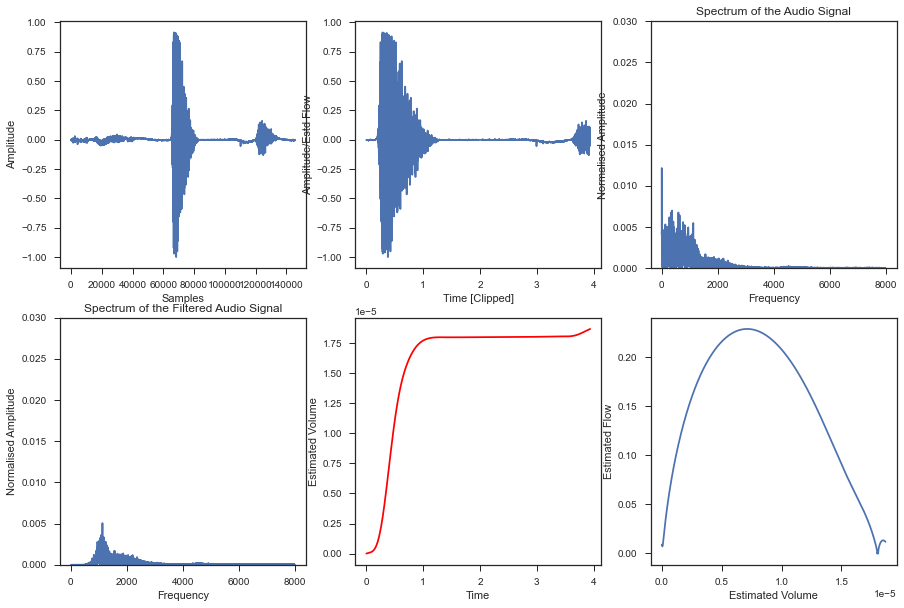

Reading: 015_FVC_Cloth_1.json
SNR= 0.00037245300151345214
Raw PEF =  11.25821794940351
Raw FEV1 =  1.3842132108012954
Raw FVC =  1.9545200746172042
Ratio% =  70.82113040319608





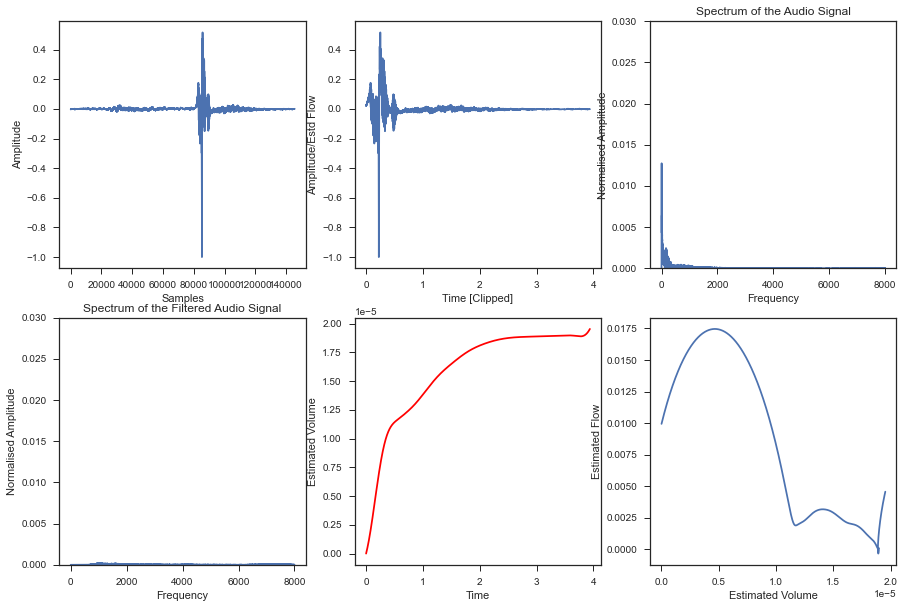

Reading: 016_FVC_Cloth_1.json
SNR= 0.03376722457887605
Raw PEF =  9.746101130564071
Raw FEV1 =  1.691086821942047
Raw FVC =  1.8838396377629731
Ratio% =  89.76808790105846





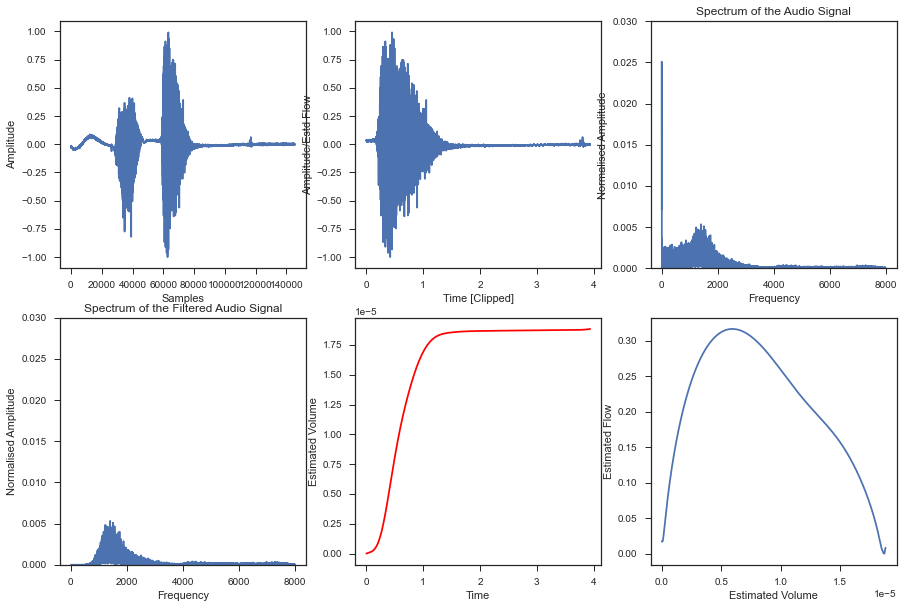

Reading: 016_FVC_Cloth_2.json
SNR= 0.00164297575714027
Raw PEF =  4.991485454752196
Raw FEV1 =  1.137251267862257
Raw FVC =  2.471234060792477
Ratio% =  46.01956916608548





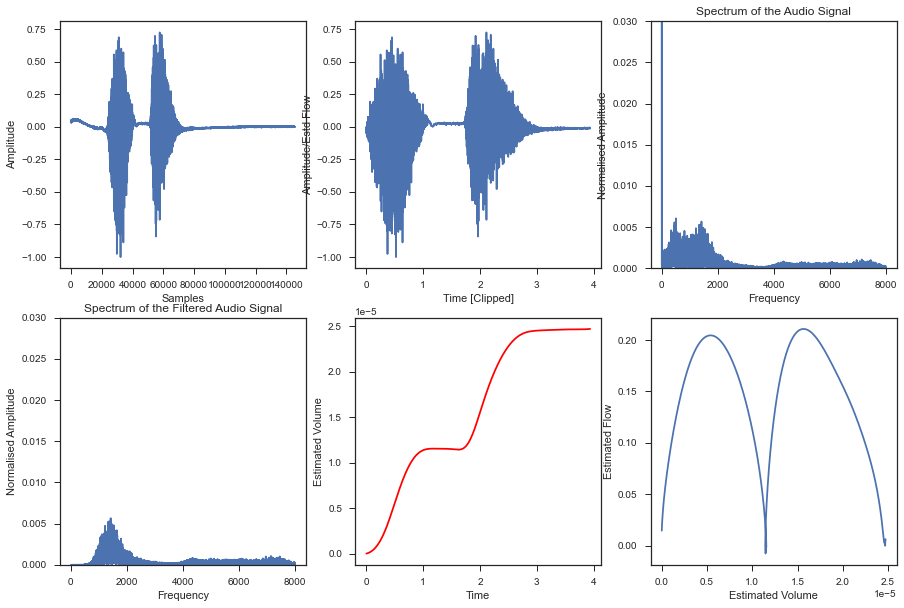

Reading: 017_FVC_Cloth_1.json
SNR= 0.0013768927009799518
Raw PEF =  12.310062468089779
Raw FEV1 =  1.699631422768218
Raw FVC =  1.982344514094404
Ratio% =  85.73844811958239





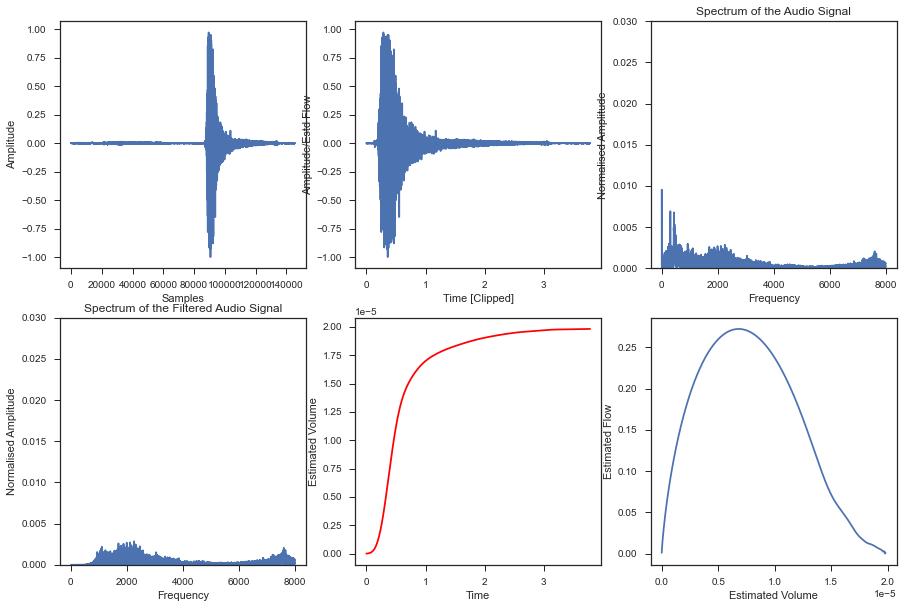

Reading: 017_FVC_Cloth_2.json
SNR= 0.0008945475607714342
Raw PEF =  12.29282451395734
Raw FEV1 =  2.0099682814883004
Raw FVC =  2.32153193188454
Ratio% =  86.57939414413642





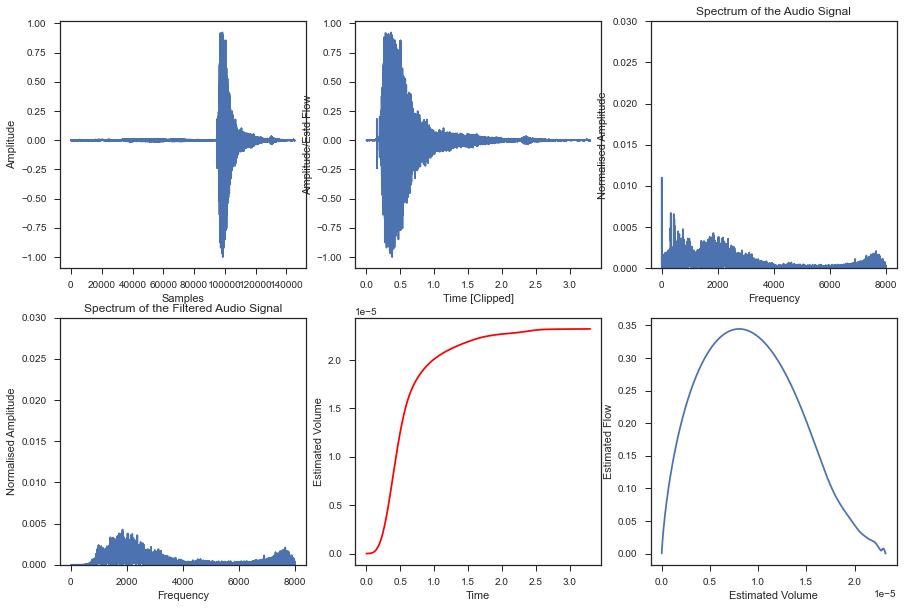

Reading: 018_FVC_Cloth_1.json
SNR= 0.009222921909578876
Raw PEF =  6.802557521316204
Raw FEV1 =  4.464815255410075
Raw FVC =  6.529081431117146
Ratio% =  68.38351309467635





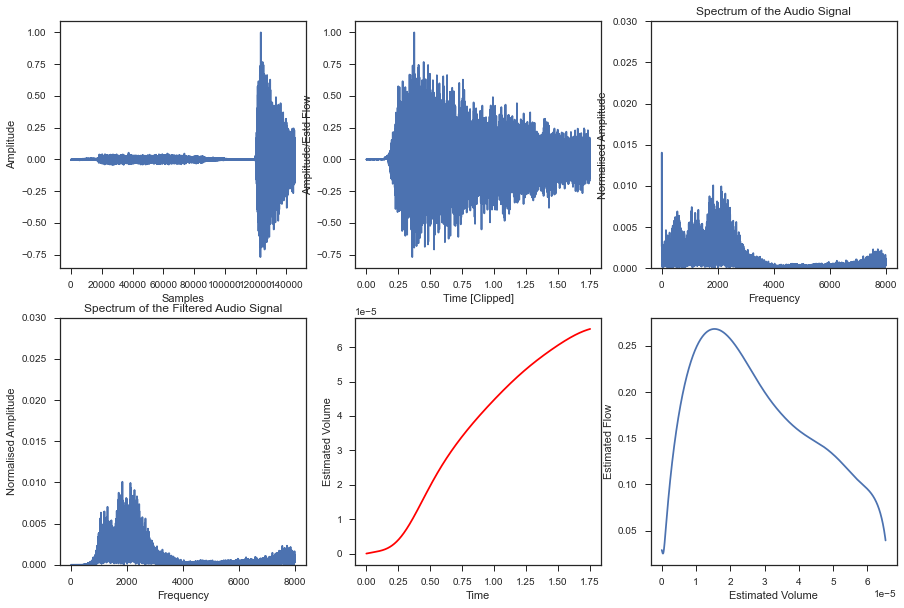

Reading: 018_FVC_Cloth_2.json
SNR= 0.002597022742203948
Raw PEF =  4.561807134955046
Raw FEV1 =  1.0139976406592477
Raw FVC =  2.333417100091812
Ratio% =  43.45548168903666





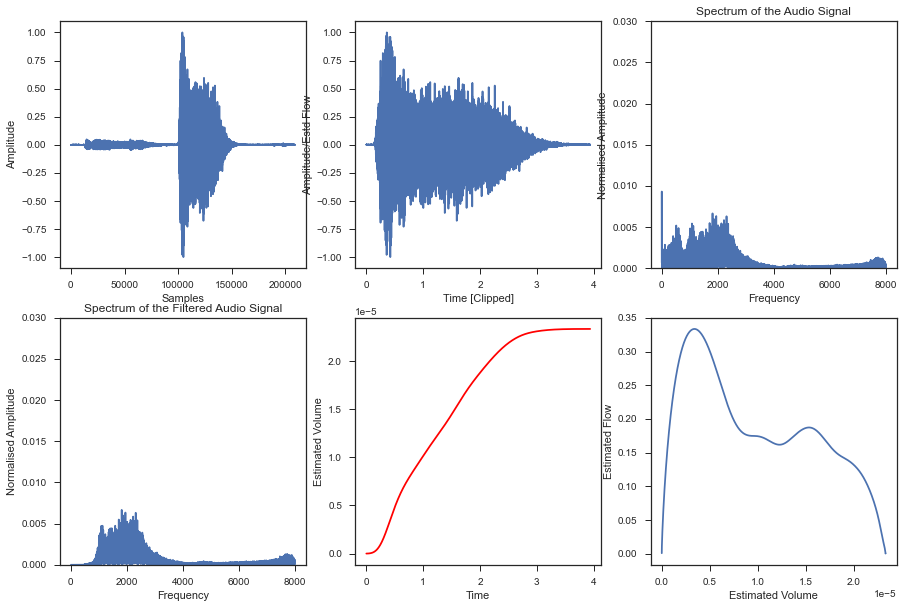

Reading: 019_FVC_Cloth_1.json
SNR= 0.004250550914126225
Raw PEF =  11.039545917077744
Raw FEV1 =  1.777628911584147
Raw FVC =  1.844516727148348
Ratio% =  96.37369428101579





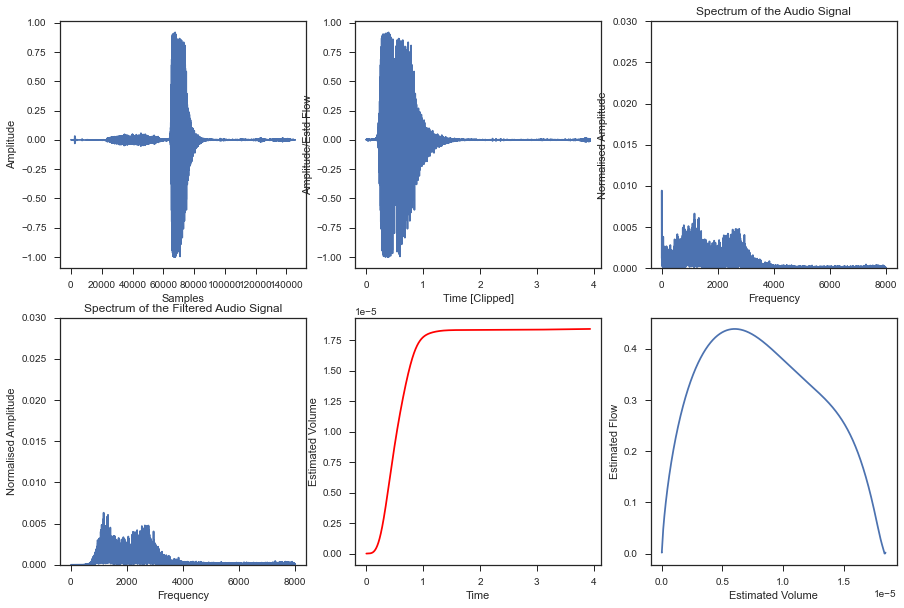

Reading: 020_FVC_Cloth_1.json
SNR= -0.0012668963995630031
Raw PEF =  10.565448827236654
Raw FEV1 =  1.7804098565692585
Raw FVC =  1.836104788463587
Ratio% =  96.96668010212353





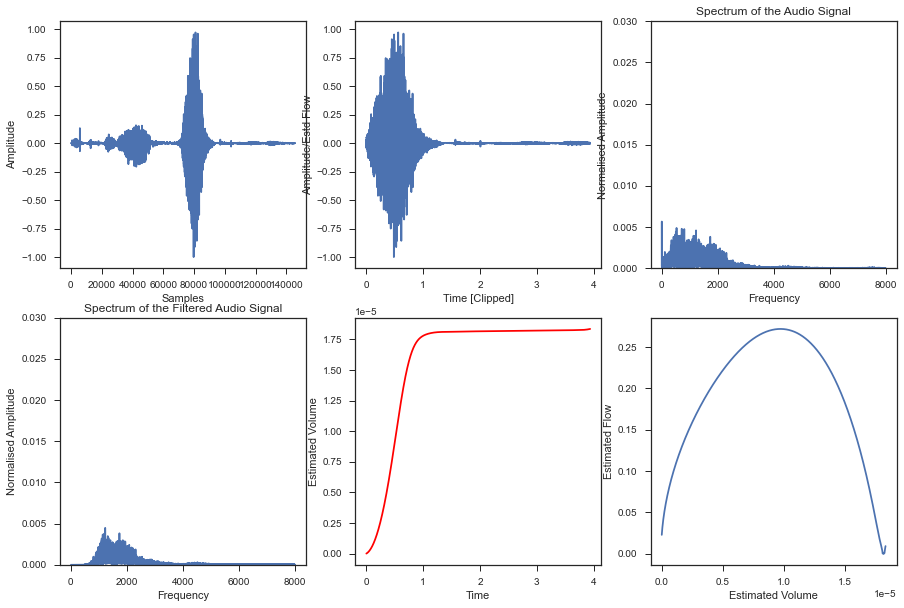

Reading: 020_FVC_Cloth_2.json
SNR= 0.0005376932384479108
Raw PEF =  12.24837362456839
Raw FEV1 =  1.799795417332017
Raw FVC =  1.8201499220002042
Ratio% =  98.88171274123292





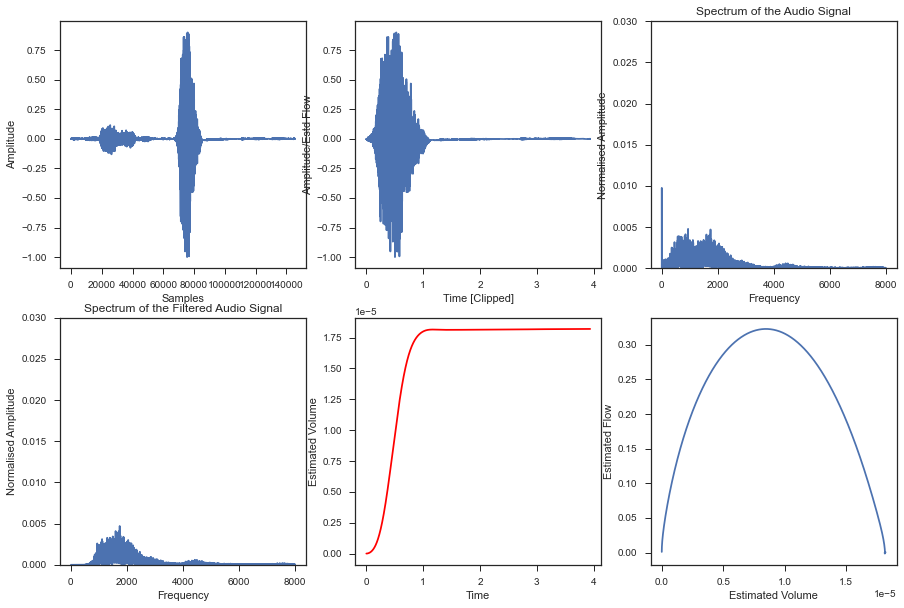

Reading: Akshat_21_cloth_1.json
SNR= 0.001102615411735172
Raw PEF =  13.994095304039854
Raw FEV1 =  1.740643780166895
Raw FVC =  1.8289312832485198
Ratio% =  95.17272716092373





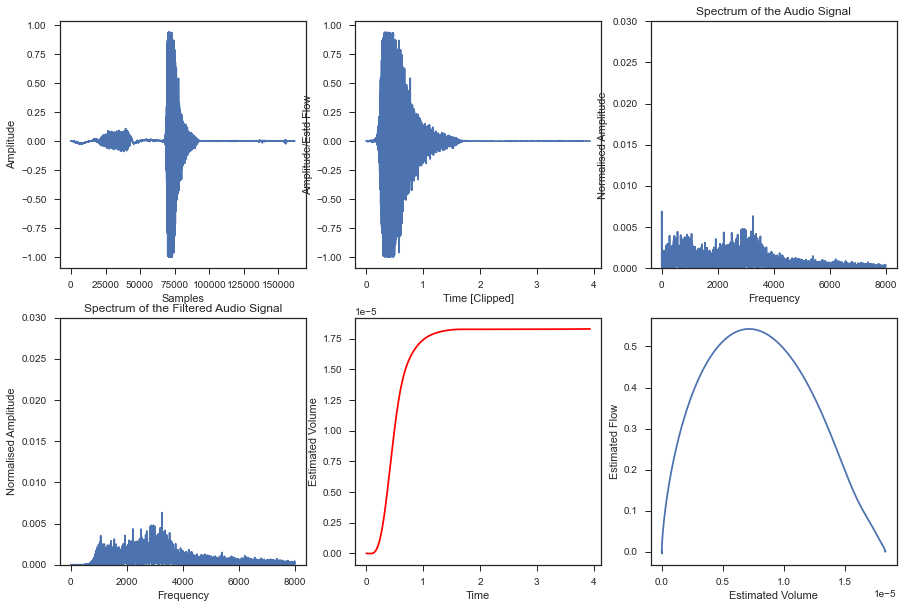

Reading: Akshat_21_cloth_2.json
SNR= 0.004156516770580792
Raw PEF =  13.268385323685644
Raw FEV1 =  1.7533692251957034
Raw FVC =  1.823870769739143
Ratio% =  96.13450987245533





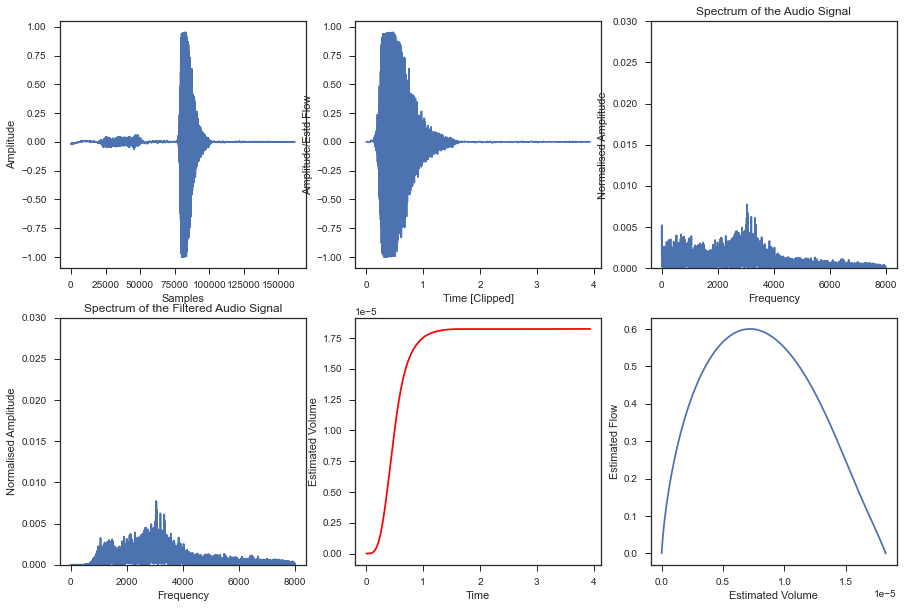

Reading: Anubhav_FVC_Cloth_1.json
SNR= 0.0063243623643876885
Raw PEF =  5.815311773621558
Raw FEV1 =  1.150099958337683
Raw FVC =  2.0773930811709405
Ratio% =  55.36265470227807





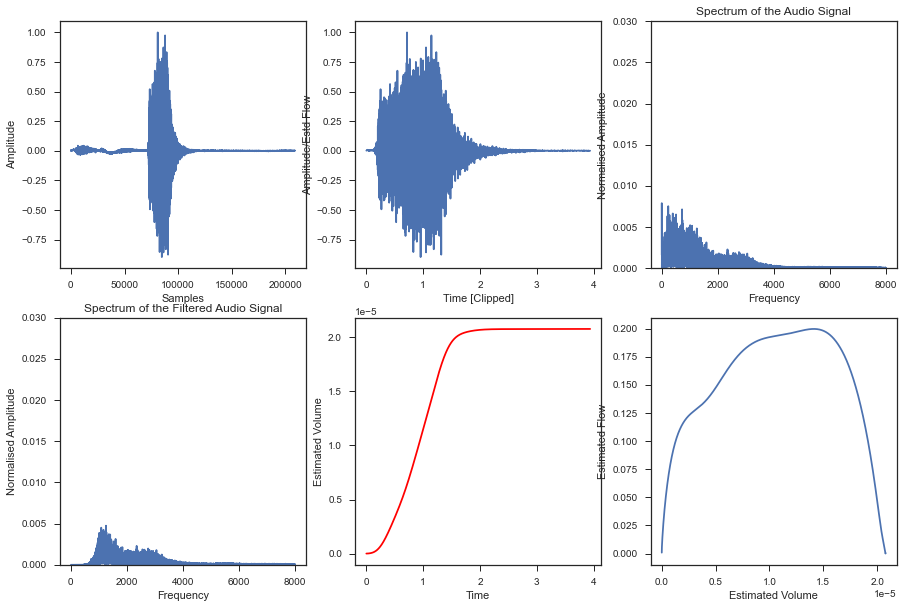

Reading: Anubhav_FVC_Cloth_2.json
SNR= 0.014838458240359738
Raw PEF =  8.547320901411734
Raw FEV1 =  1.7014353713997366
Raw FVC =  1.914387386387756
Ratio% =  88.87623181691366





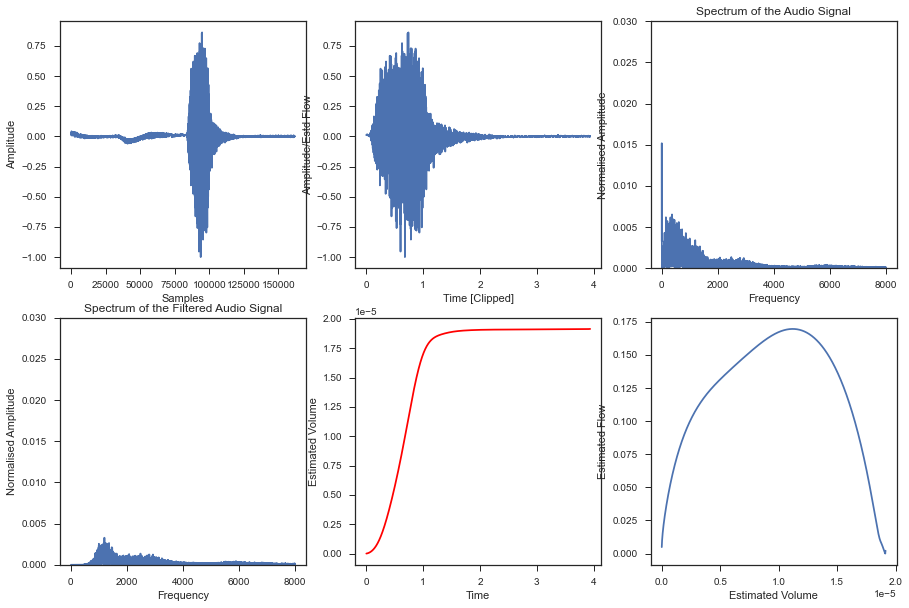

Reading: Aslam_22_cloth_1.json
SNR= 0.023598508431214898
Raw PEF =  5.93711030100204
Raw FEV1 =  1.4048222877593493
Raw FVC =  1.9892505163442562
Ratio% =  70.62068232316263





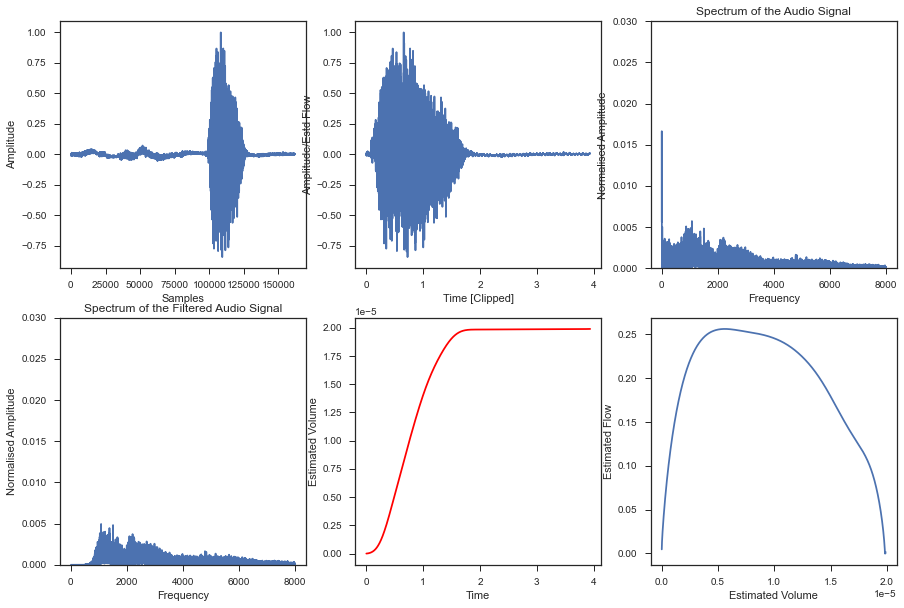

Reading: Aslam_22_cloth_2.json
SNR= 0.003060102384939456
Raw PEF =  7.041577666613232
Raw FEV1 =  1.5052027949921012
Raw FVC =  1.9452875483423684
Ratio% =  77.3768791289866





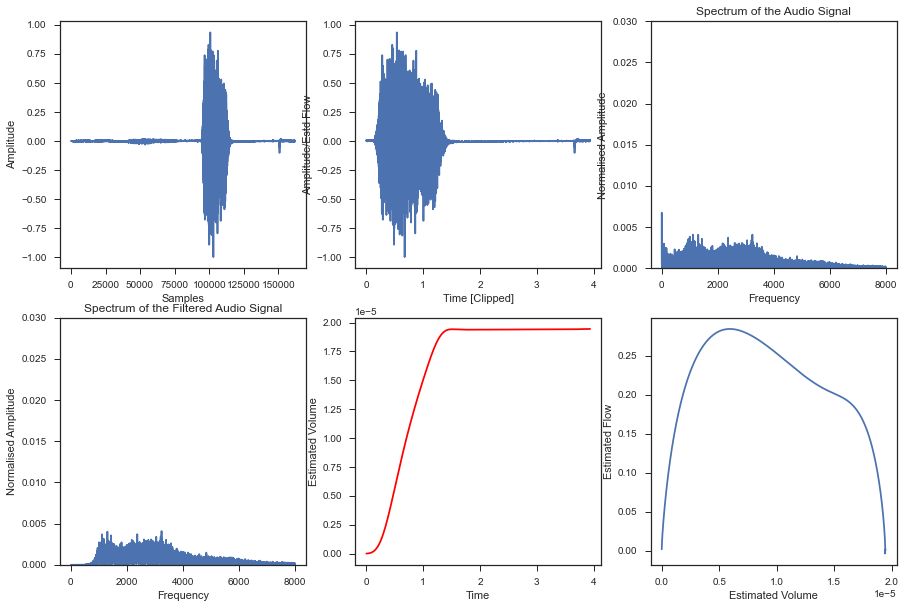

Reading: Raviraj_FVC_Cloth_1.json
SNR= 0.0037751325653368564
Raw PEF =  9.896216663944204
Raw FEV1 =  1.5474579484457847
Raw FVC =  1.9224110016539937
Ratio% =  80.49568729654538





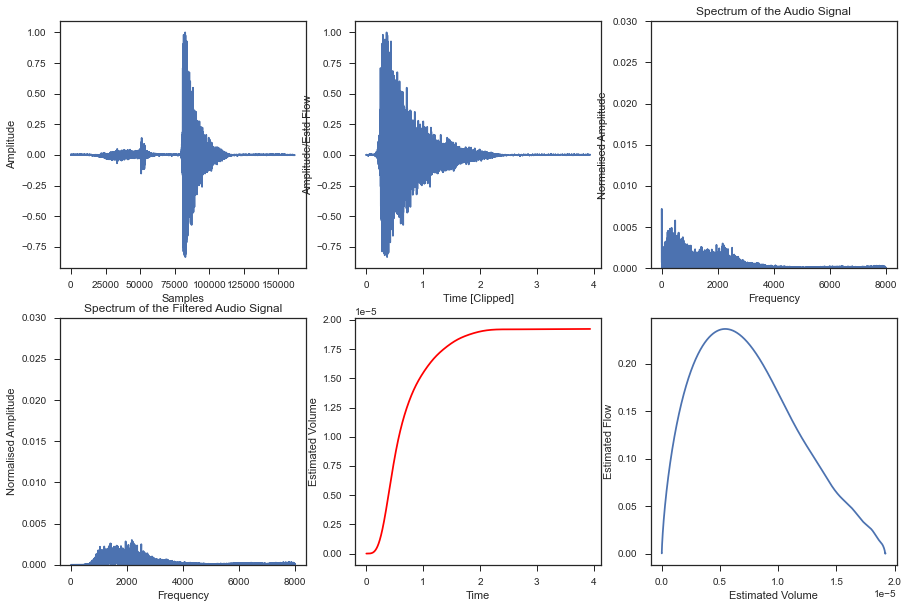

Reading: Raviraj_FVC_Cloth_2.json
SNR= 0.0032886438144534963
Raw PEF =  9.070394568506877
Raw FEV1 =  1.5675340819369479
Raw FVC =  1.9159024833631324
Ratio% =  81.81700767908258





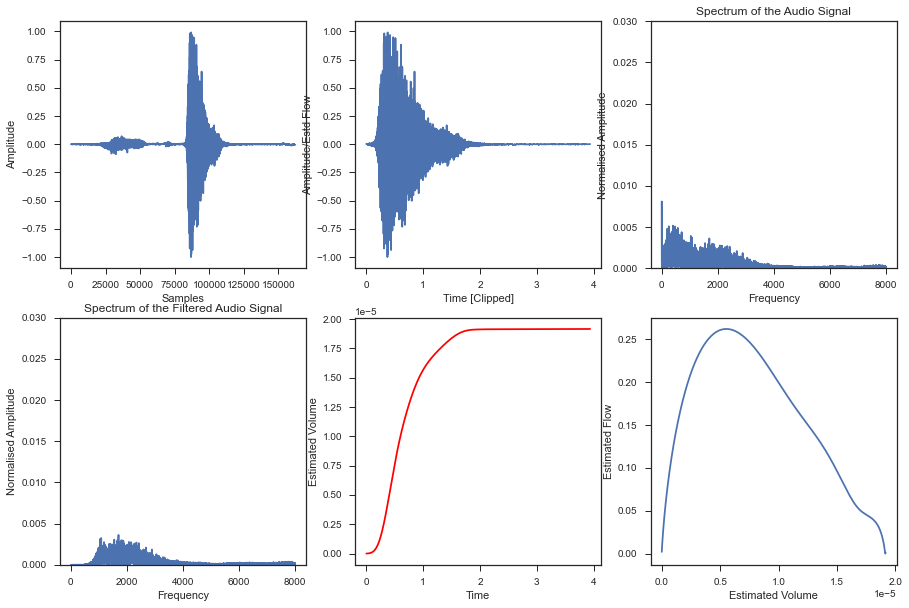

Reading: Rishiraj_FVC_ClothMask_1.json
SNR= 0.012947945900338232
Raw PEF =  8.019877550434279
Raw FEV1 =  1.4096390950538684
Raw FVC =  1.9570379299807896
Ratio% =  72.0292168822556





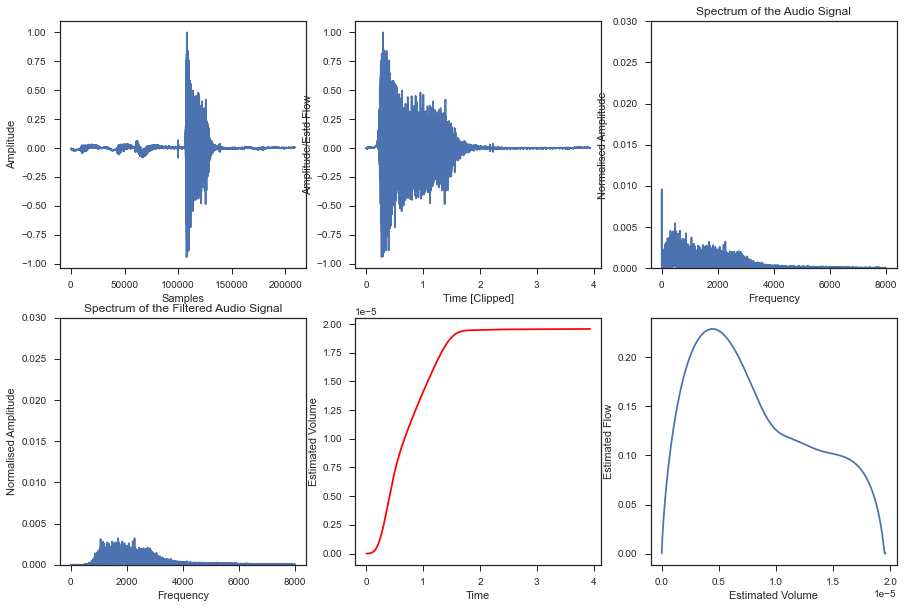

Reading: Rishiraj_FVC_ClothMask_2.json
SNR= 0.009857959543203799
Raw PEF =  7.287175947407492
Raw FEV1 =  1.3599490450394625
Raw FVC =  1.9881077860146155
Ratio% =  68.40419088975213





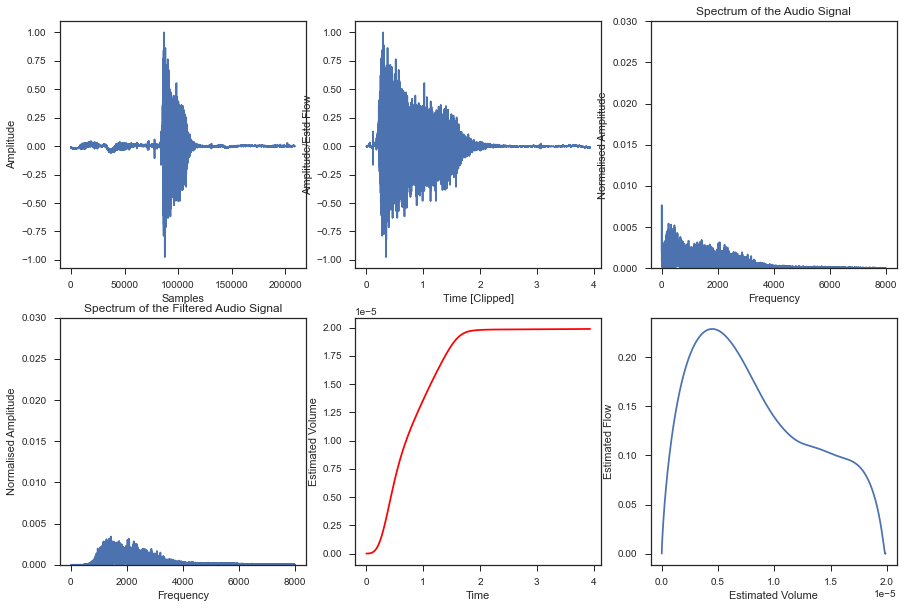

Reading: Rohit_FVC_ClothMask_1.json
SNR= -0.005276817031286272
Raw PEF =  7.60333197027852
Raw FEV1 =  1.5487814733401004
Raw FVC =  1.9169471683251111
Ratio% =  80.79416579296304





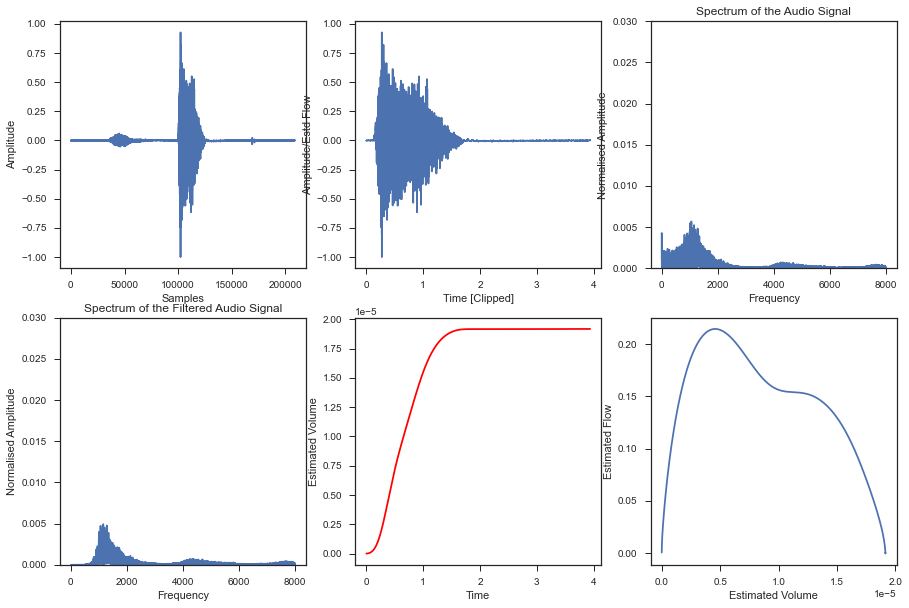

Reading: Rohit_FVC_ClothMask_2.json
SNR= -0.003870101383272146
Raw PEF =  7.335172270982137
Raw FEV1 =  1.557062097034889
Raw FVC =  1.9434916057576062
Ratio% =  80.11673898781362





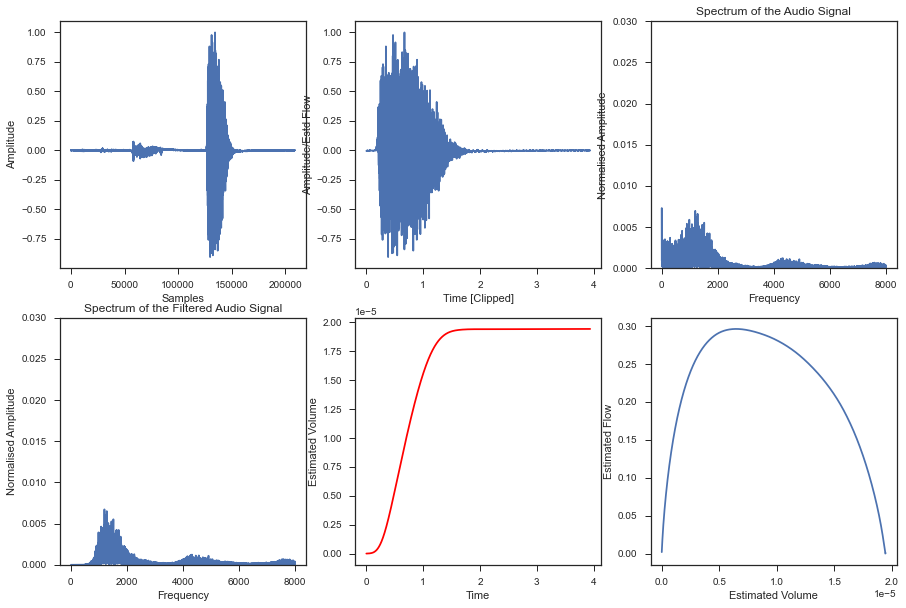

"\n#save the data\nrPFT = pd.DataFrame(\n    {'Filename': fileList,\n     'rPEF': rPEF,\n     'rFEV1': rFEV1,\n     'rFVC': rFVC\n    })\n"

In [35]:
polynomialCoef = []

rPEF = []
rFEV1 = []
rFVC = []
fileList = []

for file in filenames:
    fs = 16000
    print("Reading:", file)
    fileList.append(file)
    fig = plt.subplots(figsize=(15,10))
    x = pd.read_json(mypath+file, orient='keys')['payload']['values']
    x = x/np.max(np.abs(x))
    plt.subplot(2, 3, 1)
    plt.plot(x)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    
    #sampling rate is 16Khz
    
    
    #detect the starting point of FVC
    fvcStartIndex = np.where(x>=0.50)
    #move back x second from the point FVC started and go till y seconds
    x = x[fvcStartIndex[0][0]-4000:fvcStartIndex[0][0]-5000+64000]
    print("SNR=", x.mean()/x.std())
    t = np.arange(0,len(x))/fs
    
    plt.subplot(2, 3, 2)
    plt.plot(t,x)
    plt.ylabel('Amplitude/Estd Flow')
    plt.xlabel('Time [Clipped]')
    
    #compute FFT
    plt.subplot(2, 3, 3)
    FS, HS =compute_fft(x, fs, n = None, scale_amplitudes = True)
    plt.plot(FS,HS)
    plt.xlabel('Frequency')
    plt.ylabel('Normalised Amplitude')
    plt.title('Spectrum of the Audio Signal')
    plt.ylim([0,0.030])
    
    
    #FILTEING THE SIGNAL
    cutoff = 1000 # desired cutoff frequency of the filter, Hz
    order = 7
    x_filt = butter_highpass_filter(x, cutoff, fs, order)
    #plt.subplot(2, 3, 4)
    #plt.plot(t,x_filt)
    #plt.ylabel('Filtered Amplitude/Estd Flow')
    #plt.xlabel('Time')
    
    #compute FFT
    plt.subplot(2, 3, 4)
    FS, HS =compute_fft(x_filt, fs, n = None, scale_amplitudes = True)
    plt.plot(FS,HS)
    plt.xlabel('Frequency')
    plt.ylabel('Normalised Amplitude')
    plt.title('Spectrum of the Filtered Audio Signal')
    plt.ylim([0,0.030])
    
    
    
    # get analytic signal
    ax = signal.hilbert(x_filt)
    envelope_hat = np.abs(ax)
    #filter the Hilbert envelope
    nyq_rate = fs /0.5
    width = 1.0/nyq_rate # 5 Hz filter transition width.
    ripple_db = 10.0 # stop band attenuation
    fL_hz = 10
    N, beta = signal.kaiserord(ripple_db, width)
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

    envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
    
    #Corresponds to PEF
    rPEF.append(100000*envelope_hat_filt_normalized.max())
    print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
    
    #take cumsum of flow and then normalize
    estdVolume = np.cumsum(envelope_hat_filt)
    estdVolume = estdVolume/np.sum(estdVolume)
    
    #FEV1 Estimate
    rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
    print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
    
    plt.subplot(2, 3, 5)
    plt.plot(t,estdVolume,color='red',label='Estimated Volume')
    plt.ylabel('Estimated Volume')
    plt.xlabel('Time')
    pd.DataFrame({'Volume':estdVolume, 'time':t}).to_csv('approx-volume-time-data/clothMask/'+file+'.csv')
    
    #FVC Estimate
    rFVC.append(100000*estdVolume[-1])
    print("Raw FVC = ",100000*estdVolume[-1])
    print("Ratio% = ", (100000*estdVolume[np.where(t==1)[0][0]])/(100000*estdVolume[-1])*100)
    print("\n\n")
    
    
    plt.subplot(2, 3, 6)
    plt.plot(estdVolume, envelope_hat_filt)
    plt.xlabel('Estimated Volume')
    plt.ylabel('Estimated Flow')
    pd.DataFrame({'Volume':estdVolume, 'Flow':envelope_hat_filt}).to_csv('approx-flow-volume-data/clothMask/'+file+'.csv')
    
    
    plt.show()
    
'''
#save the data
rPFT = pd.DataFrame(
    {'Filename': fileList,
     'rPEF': rPEF,
     'rFEV1': rFEV1,
     'rFVC': rFVC
    })
'''

Reading: 005_FVC_Cloth_1.json
SNR= -0.007987858649803876
Raw PEF =  4.422770741394357
Raw FEV1 =  1.1721797943057557
Raw FVC =  2.2095172795165317
Ratio% =  53.05139747819679





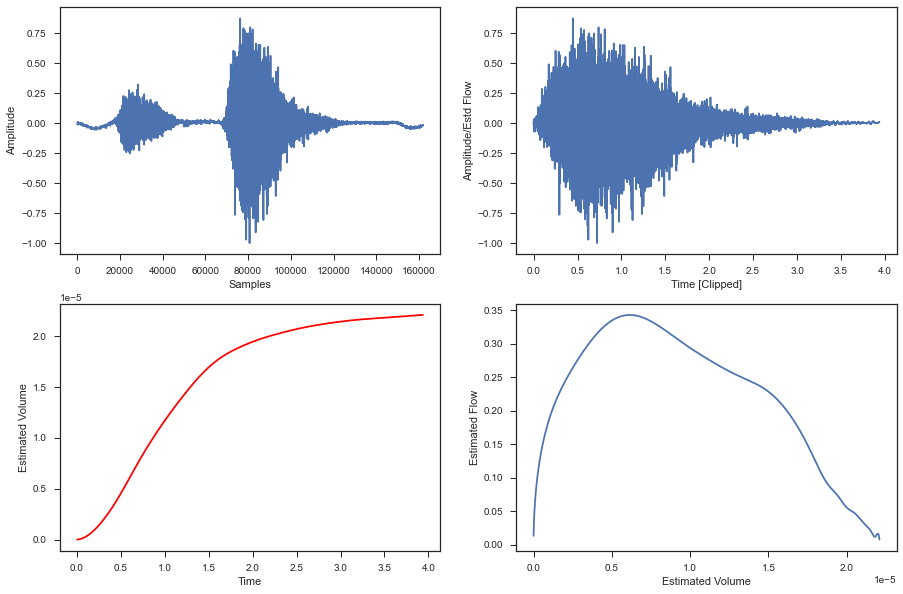

Reading: 005_FVC_Cloth_2.json
SNR= 0.0042762237037340285
Raw PEF =  4.861158594323555
Raw FEV1 =  1.2707203768594424
Raw FVC =  2.1473363348687795
Ratio% =  59.176588046562074





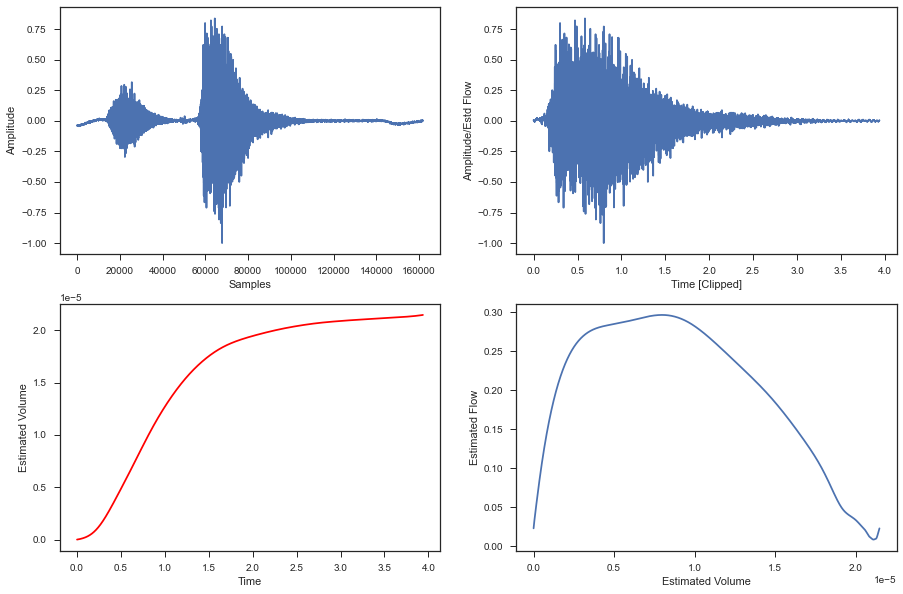

"\n#save the data\nrPFT = pd.DataFrame(\n    {'Filename': fileList,\n     'rPEF': rPEF,\n     'rFEV1': rFEV1,\n     'rFVC': rFVC\n    })\n"

In [34]:
#without any prefilter

polynomialCoef = []

rPEF = []
rFEV1 = []
rFVC = []
fileList = []

for file in filenames[:2]:
    fs = 16000
    print("Reading:", file)
    fileList.append(file)
    fig = plt.subplots(figsize=(15,10))
    x = pd.read_json(mypath+file, orient='keys')['payload']['values']
    x = x/np.max(np.abs(x))
    plt.subplot(2, 2, 1)
    plt.plot(x)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    
    #sampling rate is 16Khz
    
    
    #detect the starting point of FVC
    fvcStartIndex = np.where(x>=0.50)
    #move back x second from the point FVC started and go till y seconds
    x = x[fvcStartIndex[0][0]-4000:fvcStartIndex[0][0]-5000+64000]
    print("SNR=", x.mean()/x.std())
    t = np.arange(0,len(x))/fs
    
    plt.subplot(2, 2, 2)
    plt.plot(t,x)
    plt.ylabel('Amplitude/Estd Flow')
    plt.xlabel('Time [Clipped]')
    
    #No PRE FILTER
    
    
    # get analytic signal
    ax = signal.hilbert(x)
    envelope_hat = np.abs(ax)
    #filter the Hilbert envelope
    nyq_rate = fs /0.5
    width = 1.0/nyq_rate # 5 Hz filter transition width.
    ripple_db = 10.0 # stop band attenuation
    fL_hz = 10
    N, beta = signal.kaiserord(ripple_db, width)
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

    envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
    
    #Corresponds to PEF
    rPEF.append(100000*envelope_hat_filt_normalized.max())
    print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
    
    #take cumsum of flow and then normalize
    estdVolume = np.cumsum(envelope_hat_filt)
    estdVolume = estdVolume/np.sum(estdVolume)
    
    #FEV1 Estimate
    rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
    print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
    
    plt.subplot(2, 2, 3)
    plt.plot(t,estdVolume,color='red',label='Estimated Volume')
    plt.ylabel('Estimated Volume')
    plt.xlabel('Time')
    pd.DataFrame({'Volume':estdVolume, 'time':t}).to_csv('approx-volume-time-data/clothMask/'+file+'.csv')
    
    #FVC Estimate
    rFVC.append(100000*estdVolume[-1])
    print("Raw FVC = ",100000*estdVolume[-1])
    print("Ratio% = ", (100000*estdVolume[np.where(t==1)[0][0]])/(100000*estdVolume[-1])*100)
    print("\n\n")
    
    
    plt.subplot(2, 2, 4)
    plt.plot(estdVolume, envelope_hat_filt)
    plt.xlabel('Estimated Volume')
    plt.ylabel('Estimated Flow')
    pd.DataFrame({'Volume':estdVolume, 'Flow':envelope_hat_filt}).to_csv('approx-flow-volume-data/clothMask/'+file+'.csv')
    
    
    plt.show()
    
'''
#save the data
rPFT = pd.DataFrame(
    {'Filename': fileList,
     'rPEF': rPEF,
     'rFEV1': rFEV1,
     'rFVC': rFVC
    })
'''

In [87]:
fs*3

132300

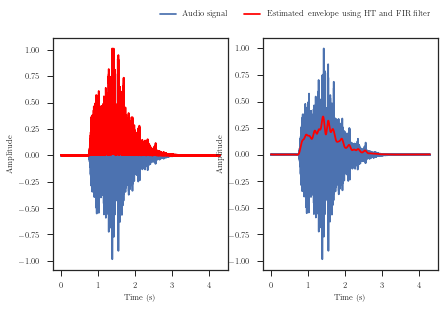

In [92]:
figname = 'audio-envelope'
lt.latexify(columns=2)
[fs, x] = wavfile.read("audioData/FVC-1.wav")
x = x/np.max(np.abs(x))
x = x[132300:]
t = np.arange(0,len(x))/fs
# get analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
#filter the Hilbert envelope
nyq_rate = fs / 2.0
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

#lt.format_axes(ax)

ax = plt.subplot(1,2,1)
ax.plot(t,x,label='Audio signal')
ax.plot(t,envelope_hat,color='red',label='Estimated envelope using HT')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
#ax.legend(loc='upper right',frameon=False,fontsize=12)

ax = plt.subplot(1,2,2)
ax.plot(t,x,label='Audio signal')
ax.plot(t,envelope_hat_filt,color='red',label='Estimated envelope using HT and FIR filter')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=2, bbox_to_anchor=[1.,1.15])

#lt.format_axes(ax)

#plt.savefig(figname+'.pdf', bbox_inches='tight')

# plt.xlim(0,0.5)
#plt.ylim(-1,1.5)
plt.show()

In [35]:
#Corresponds to PEF
envelope_hat_filt.max()

0.4487636776600239

In [36]:
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

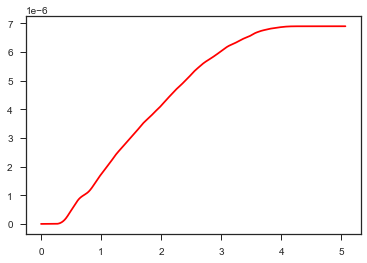

In [37]:
plt.plot(t,estdVolume,color='red',label='Estimated Volume')

In [38]:
#FEV1 Estimate
estdVolume[np.where(t==1)[0][0]]

1.731395981916569e-06

In [46]:
#FVC Estimate
estdVolume[-1]

6.9036928228316145e-06

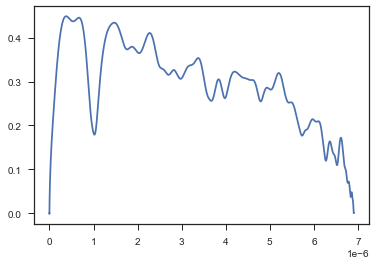

In [40]:
#estimated flow volume curve | Both y-axis and x-axis are normalized between 0 and 1
len(estdVolume) == len(envelope_hat_filt)
plt.plot(estdVolume, envelope_hat_filt)

In [12]:
import latexify as lt

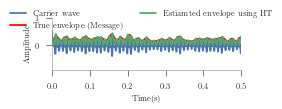

In [51]:
# envelope with no kaiser window
figname="am-carrier"
lt.latexify()
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
# plt.plot(x)
#fig = plt.subplots(figsize=(16,8))
ax = plt.subplot(2,1,1)
ax.plot(t,x,label='Carrier wave')
ax.plot(t,envelope,color='red', label='True envelope (Message)')
ax.plot(t,envelope_hat,label='Estiamted envelope using HT')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=2, bbox_to_anchor=[1.2,1.3])
#ax.legend(bbox_to_anchor=[0.43,1.],ncol=3)
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)
#ax.grid(True)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.9,1.)
lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')
plt.show()

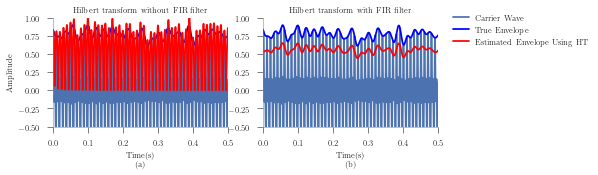

In [139]:
figname="am-carrier"
lt.latexify(columns=2, fig_height=2)
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

#fig = plt.subplots(figsize=(16,4))
ax = plt.subplot(1,2,1)
ax.plot(t,x,label='Carrier Wave')
ax.plot(t,envelope,color='blue',label='True Envelope')
ax.plot(t,envelope_hat,color='red',label='Estimated Envelope Using HT')
ax.set_title('Hilbert transform without FIR filter')
ax.set_xlabel('Time(s)\n (a)')
ax.set_ylabel('Amplitude')
#ax.legend(loc='upper right',frameon=False,fontsize=12)

ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.5,1)

lt.format_axes(ax)

ax = plt.subplot(1,2,2)
ax.plot(t,x,label='Carrier Wave')
ax.plot(t,envelope,color='blue',label='True Envelope')
ax.plot(t,envelope_hat_filt,color='red',label='Estimated Envelope Using HT')
ax.set_title('Hilbert transform with FIR filter')
ax.set_xlabel('Time(s)\n (b)')
#ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=1, bbox_to_anchor=[1.9,1.1])
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)


plt.xlim(0,0.5)
plt.ylim(-.5,1)

lt.format_axes(ax)

plt.savefig(figname+'.pdf', bbox_inches='tight')

plt.show()

In [137]:
def create_envelope(num_samples,fL_hz=100,N=1000,beta=3):
    # we will create the envelope by low pass filtering white noise
    mean = 0
    std = 1
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    x = np.random.normal(mean, std, size=num_samples)
    x = signal.filtfilt(taps, 1,x)
    x = (x-np.min(x))
    x = x/np.max(x)
    return x
def create_carrier_harmonic(fs=8e3,fc=200,num_samples=1000,ncomps=1):
    # this will create a harmonic carrier with ncomps harmonics
    x = []
    for i in range(ncomps):
        x.append(np.sin(2*np.pi*(i+1)*fc*np.arange(0,num_samples,1)/fs))
    x = sum(x)
    x = x/np.max(np.abs(x))
    return x
def create_carrier_noise(mean=0,std=1,num_samples=1000):
    # this will create a white noise carrier
    x = np.random.normal(mean, std, size=num_samples)
    x = x/np.abs(x)
    return x